# Github Repo Classification


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

import sys
import os

from main import aggregate_data
from metrics.githubMetrics import GithubMetrics, metricCollection
from importer.testDataImporter import TestDataImporter

## Data Aggregation

In [2]:
importer = TestDataImporter('data/testset.csv')
data = aggregate_data(importer.trainset.repos + importer.testset.repos)
data

,repo,watcher_count,forks_count,open_issue_count,avg_folder_depth,file_folder_ratio,file_count,up_to_dateness,repo_size,avg_entropy
0,https://github.com/briantemple/homeworkr,6,2,0,2.761905,2.564516,159,1.520395e+08,226,0.536693
1,https://github.com/spring-projects/spring-boot,8731,8400,629,8.060362,1.460417,4206,2.600741e+04,58418,0.611183
2,https://github.com/facebook/react,54971,9839,672,3.239316,5.572973,1031,5.353094e+03,148430,0.651396
3,https://github.com/nodegit/nodegit,2289,352,156,4.731148,8.785901,3365,3.519864e+05,29623,0.629076
4,https://github.com/scipy/scipy,2725,1579,960,4.723757,9.365462,2332,7.376985e+03,80439,0.560415
5,https://github.com/spez/RottenTomatoes,0,0,1,2.920000,3.369565,155,7.809826e+07,2064,0.627591
6,https://github.com/m2mtech/calculator-2015,71,25,1,2.823529,1.678571,47,1.411112e+07,518,0.639786
7,https://github.com/bcaffo/751and2,7,24,2,2.275862,5.236842,199,3.129853e+07,16773,0.783981
8,https://github.com/HPI-SWA-Teaching/SWT16-Proj...,0,5,0,3.773585,5.703297,519,3.847940e+06,328,0.539524
9,https://github.com/uwhpsc-2016/example-python-...,0,7,4,2.976744,1.215686,62,2.020468e+07,7,0.750825


## Visualizations

we want to compare stuff

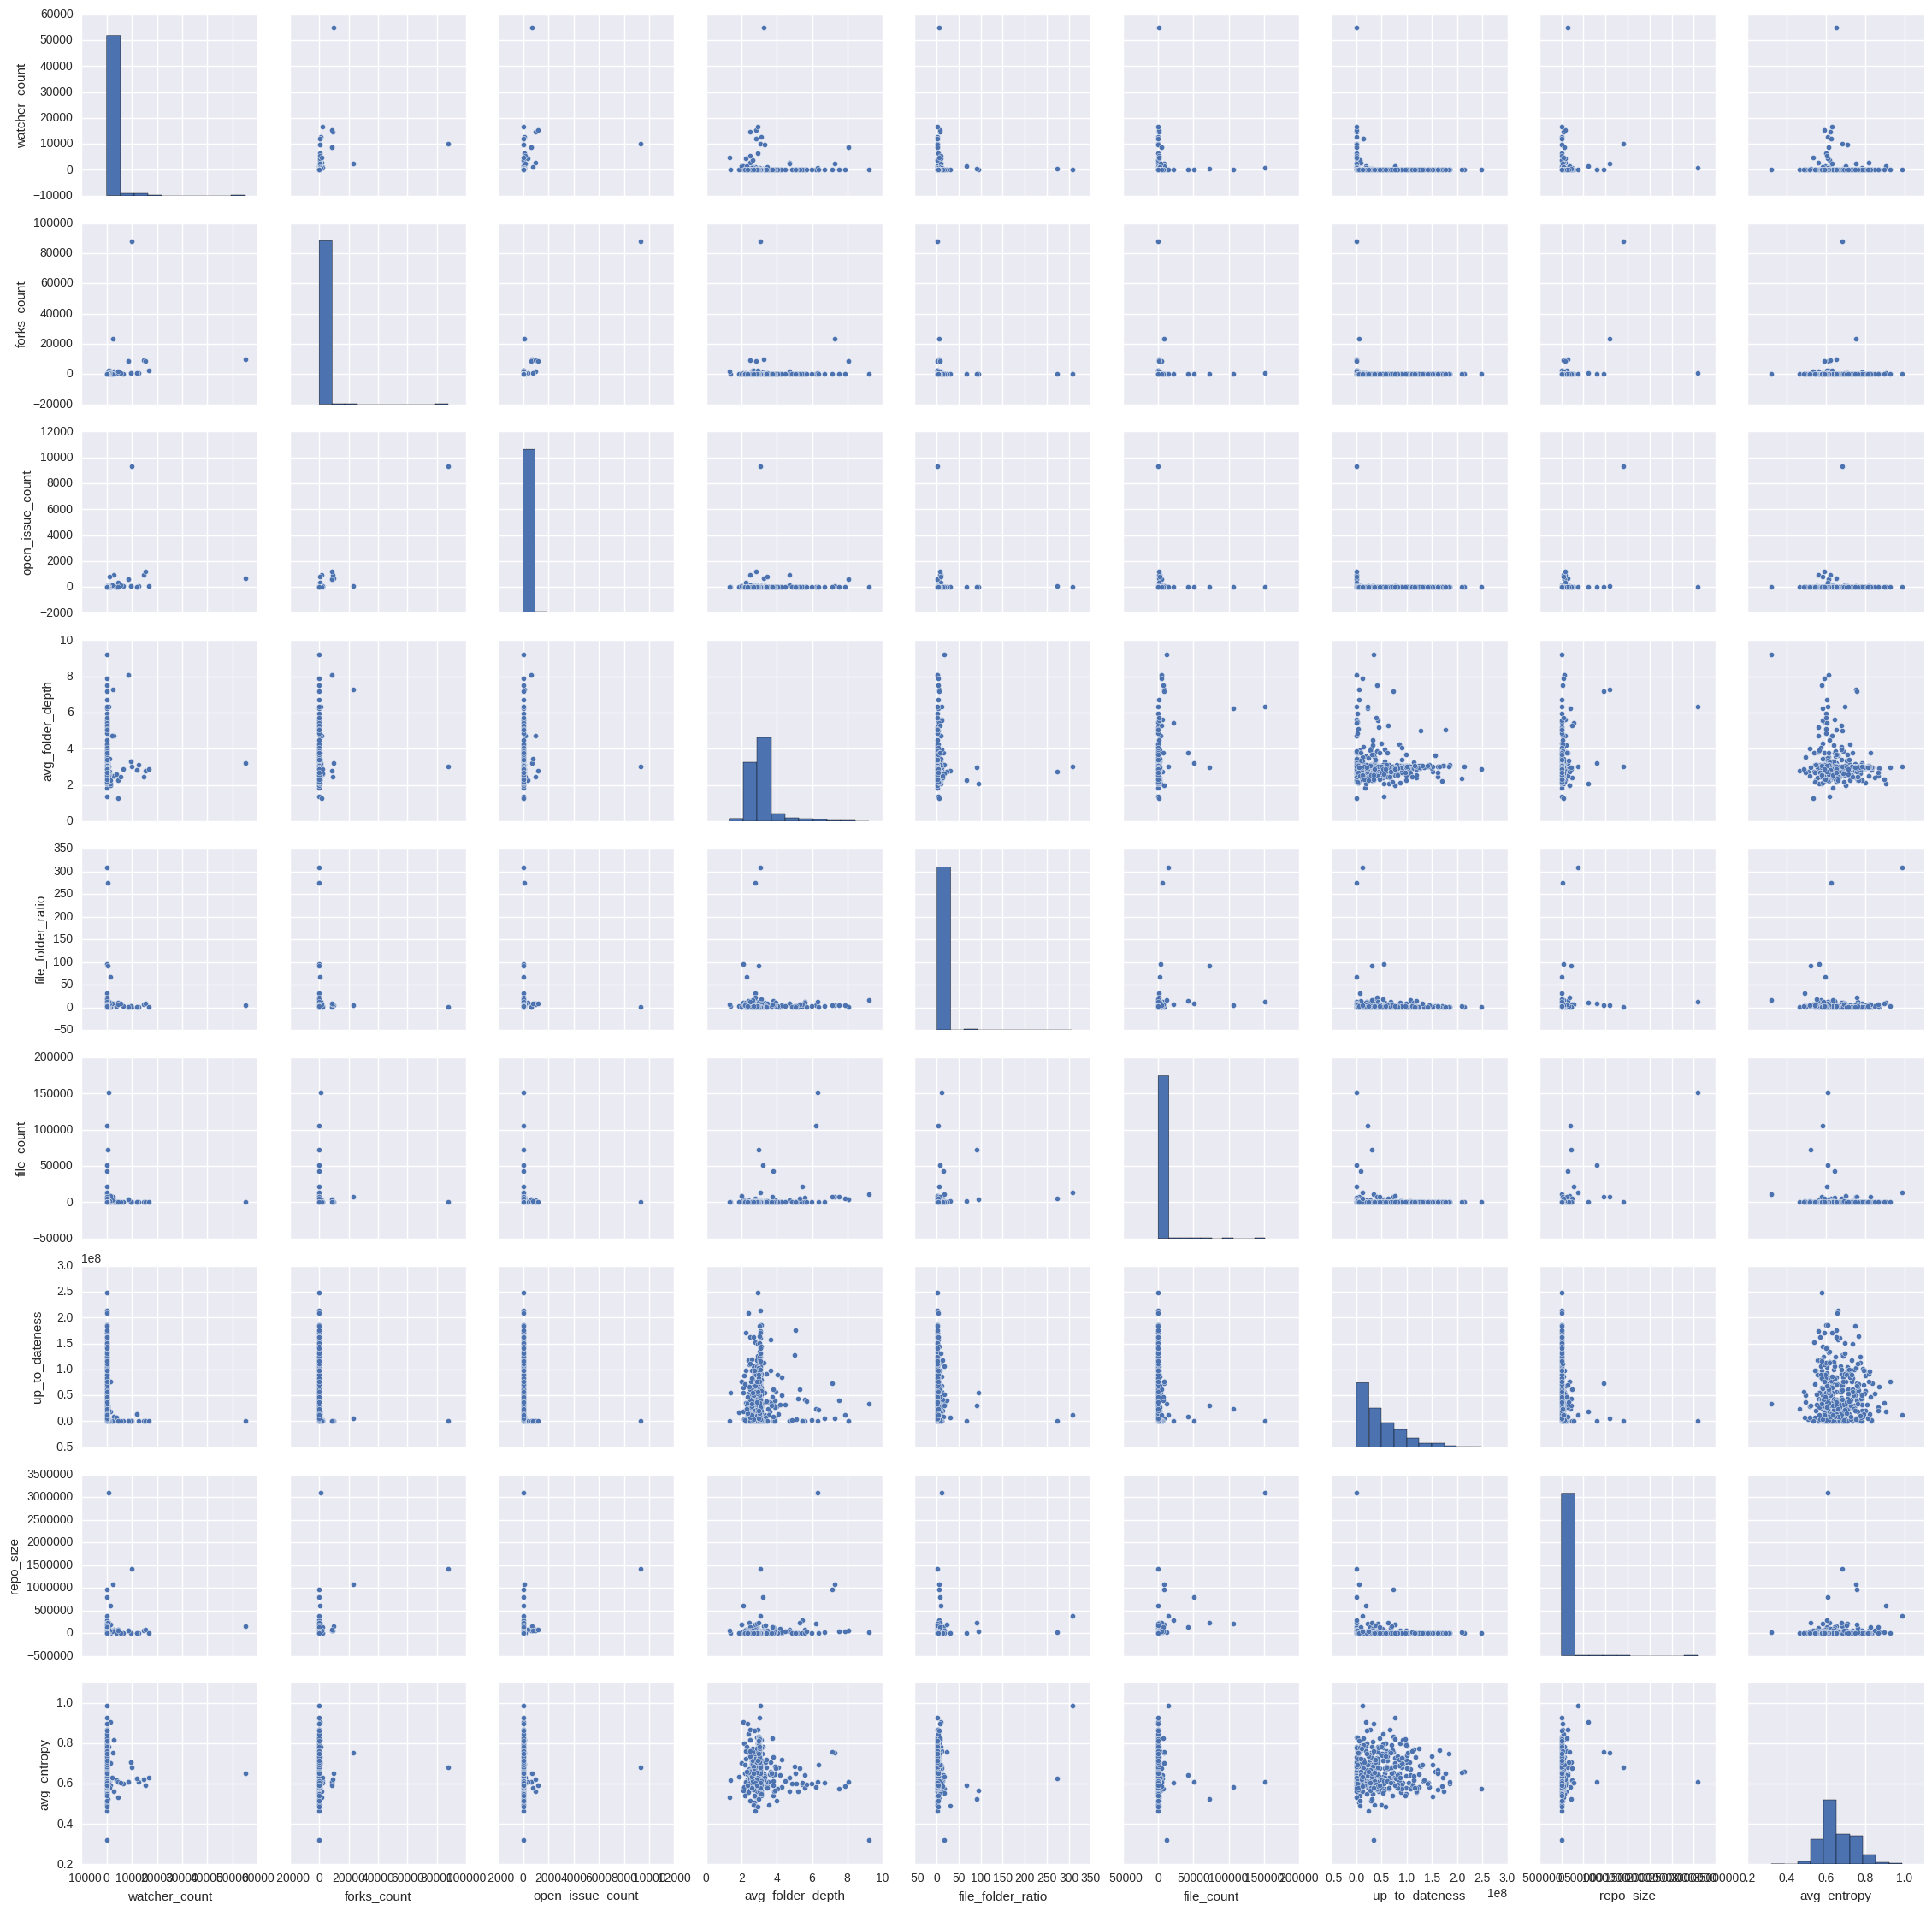

In [3]:
sbn.pairplot(data)

In [4]:
#norm_data = data
metric_list = list(metricCollection.keys())
for metric in metric_list:
    print(data[metric].describe())

count      410.000000
mean       606.843902
std       3387.353407
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max      54971.000000
Name: watcher_count, dtype: float64
count      410.000000
mean       442.480488
std       4583.256388
min          0.000000
25%          0.000000
50%          0.000000
75%         15.750000
max      87815.000000
Name: forks_count, dtype: float64
count     410.000000
mean       42.985366
std       474.033620
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max      9344.000000
Name: open_issue_count, dtype: float64
count    410.000000
mean       3.106347
std        0.930340
min        1.295455
25%        2.734783
50%        2.974359
75%        3.075549
max        9.221818
Name: avg_folder_depth, dtype: float64
count    410.000000
mean       5.211951
std       21.568998
min        1.000000
25%        1.241932
50%        1.902381
75%        3.905693
max      308.777778
Name: file_f

In [5]:
data.columns

Index(['repo', 'watcher_count', 'forks_count', 'open_issue_count',
       'avg_folder_depth', 'file_folder_ratio', 'file_count', 'up_to_dateness',
       'repo_size', 'avg_entropy'],
      dtype='object')

In [6]:
# normalize distribution
norm_data = pd.DataFrame({
        'avg_entropy': data['avg_entropy']
})
for metric in metric_list[1:]:
    norm_data[metric] = np.log(data[metric] + 1)
    norm_data[metric] = (norm_data[metric] - norm_data[metric].min()) / (norm_data[metric].max() - norm_data[metric].min())
norm_data

,avg_entropy,forks_count,open_issue_count,avg_folder_depth,file_folder_ratio,file_count,up_to_dateness,repo_size
0,0.371001,0.096513,0.000000,0.330742,0.114597,0.262199,0.954113,0.362970
1,0.486575,0.793825,0.705021,0.919245,0.041086,0.614077,0.147191,0.734337
2,0.546766,0.807714,0.712242,0.410735,0.235948,0.462830,0.000146,0.796727
3,0.513541,0.515371,0.553043,0.612606,0.314870,0.590073,0.389559,0.688903
4,0.408404,0.647033,0.751206,0.611742,0.326279,0.550619,0.029976,0.755739
5,0.511314,0.000000,0.075815,0.358304,0.154979,0.259474,0.892137,0.510698
6,0.529539,0.286225,0.075815,0.341621,0.057932,0.132616,0.732956,0.418300
7,0.735320,0.282779,0.120164,0.238117,0.225539,0.286216,0.807067,0.650849
8,0.375495,0.157407,0.000000,0.490205,0.239842,0.389058,0.612066,0.387800
9,0.689515,0.182680,0.176037,0.367926,0.020310,0.161884,0.766351,0.139130


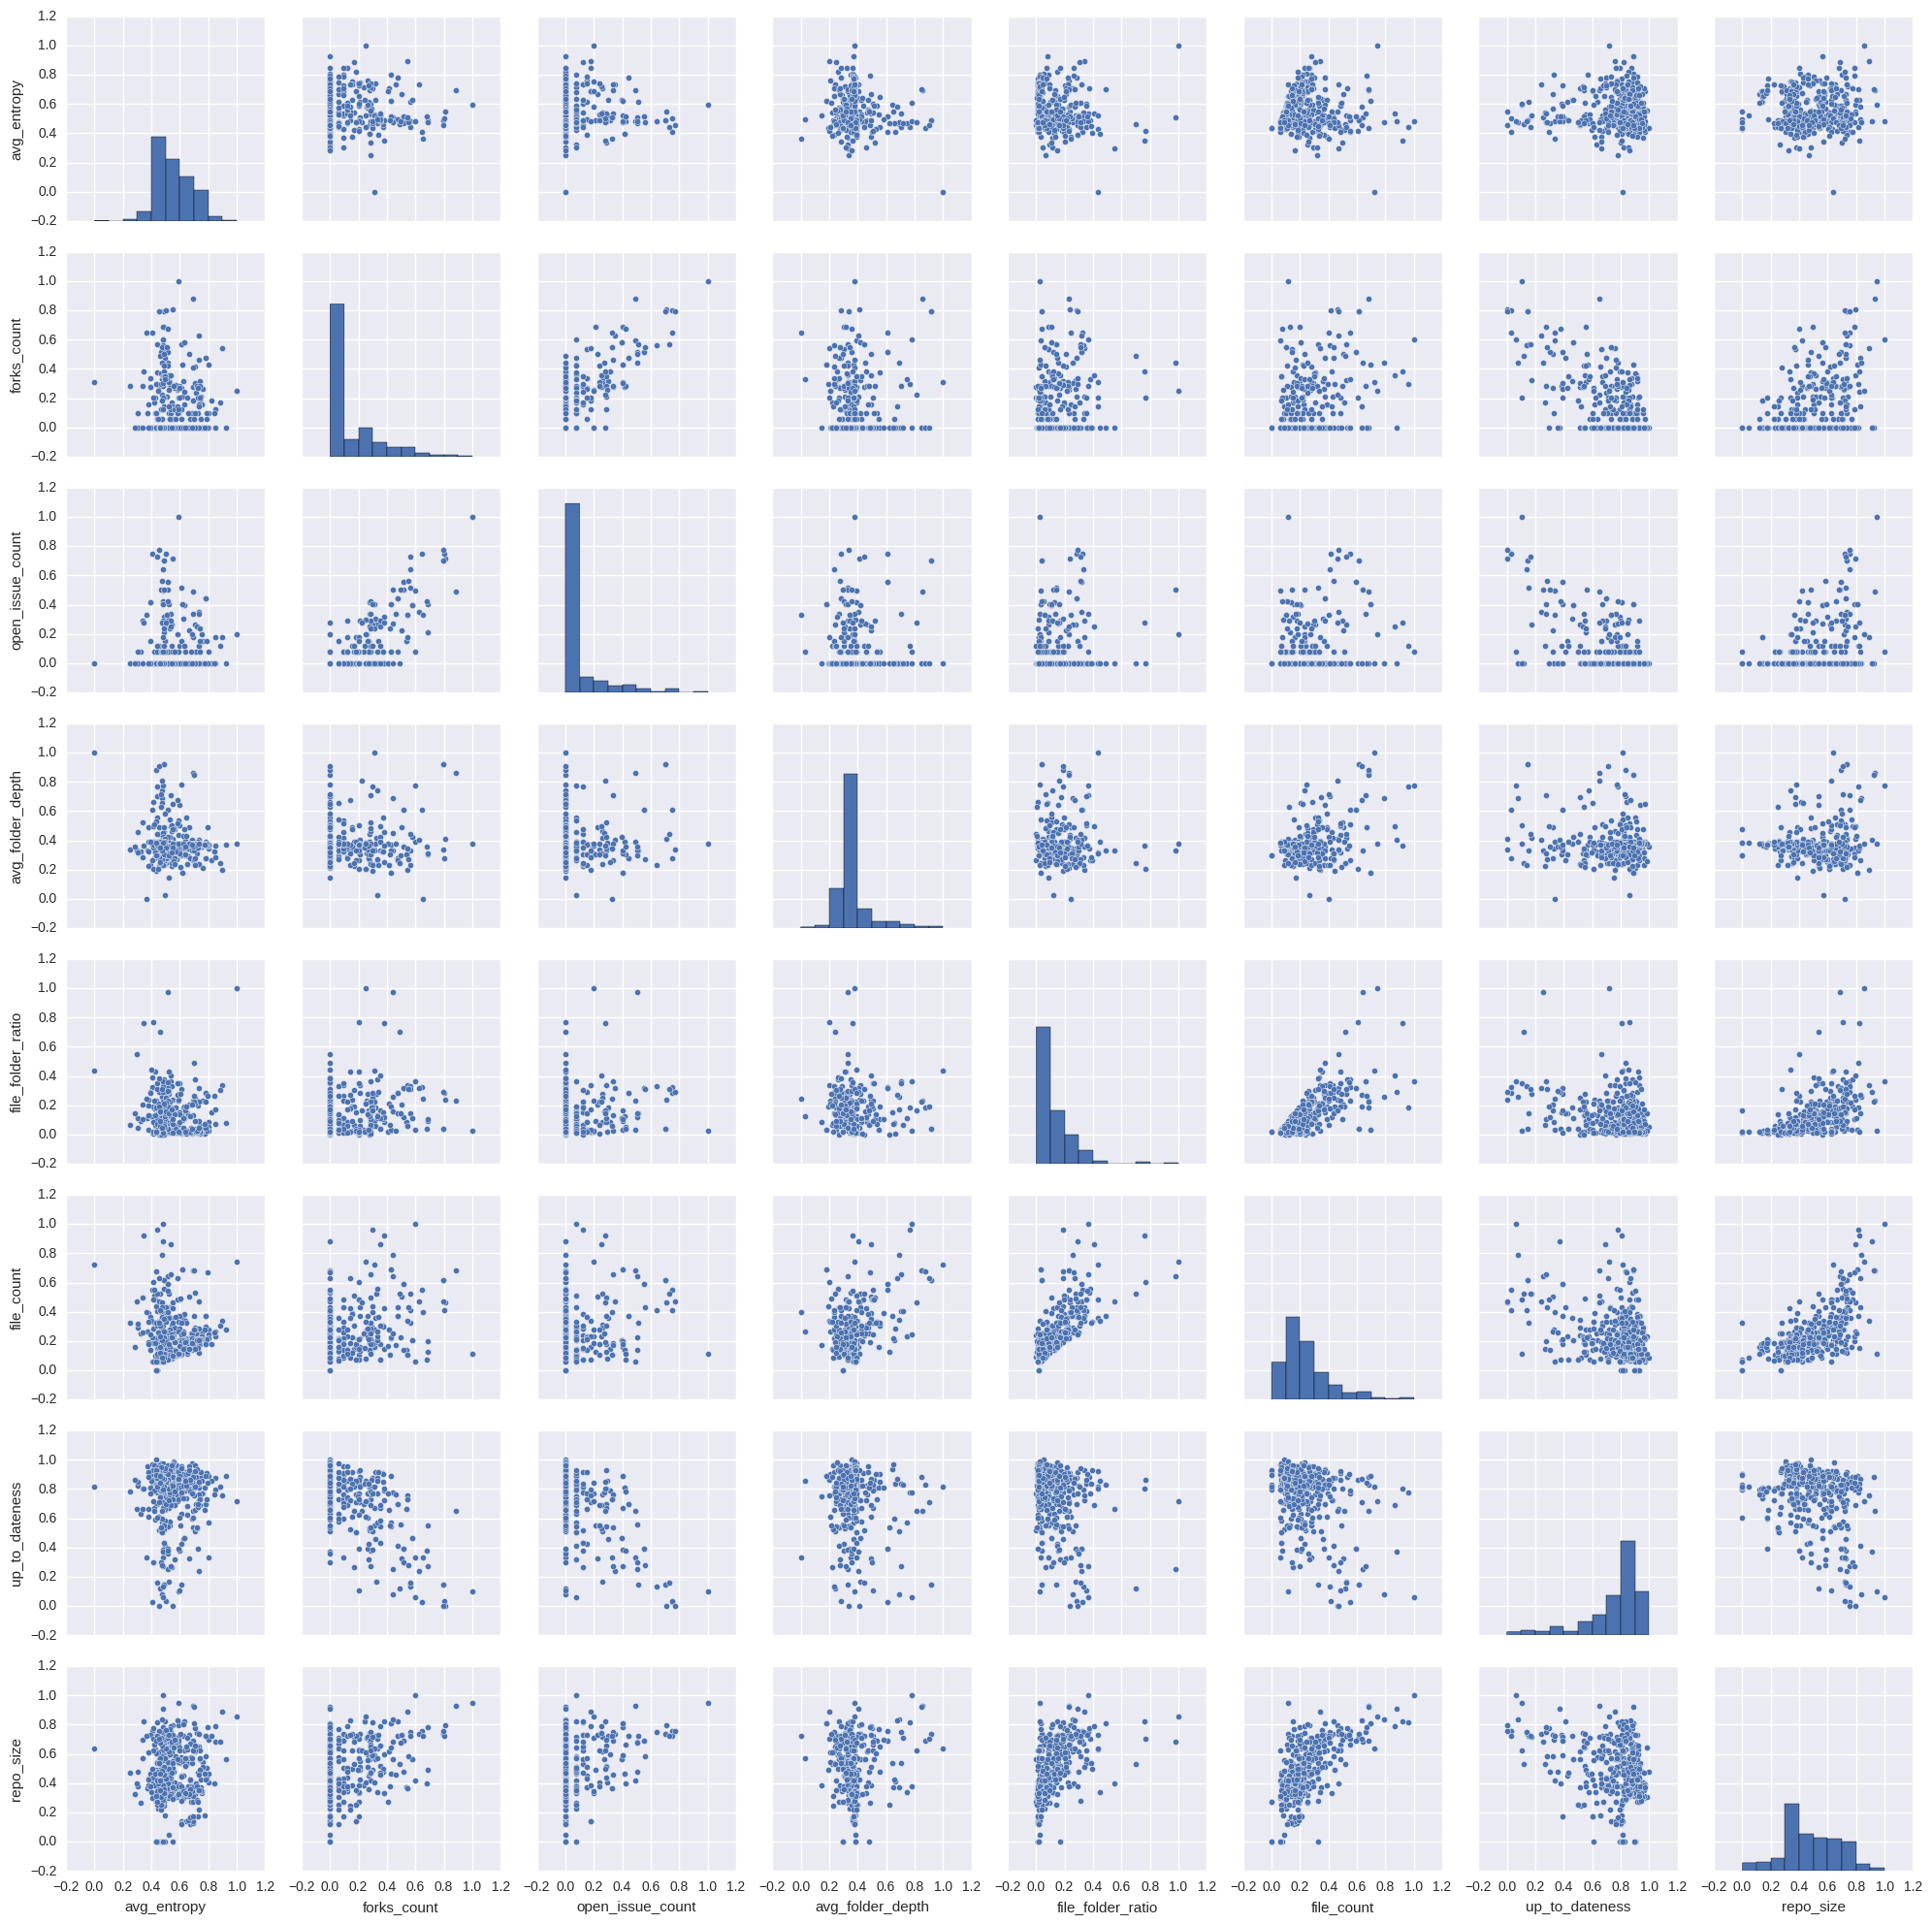

In [7]:
sbn.pairplot(norm_data)

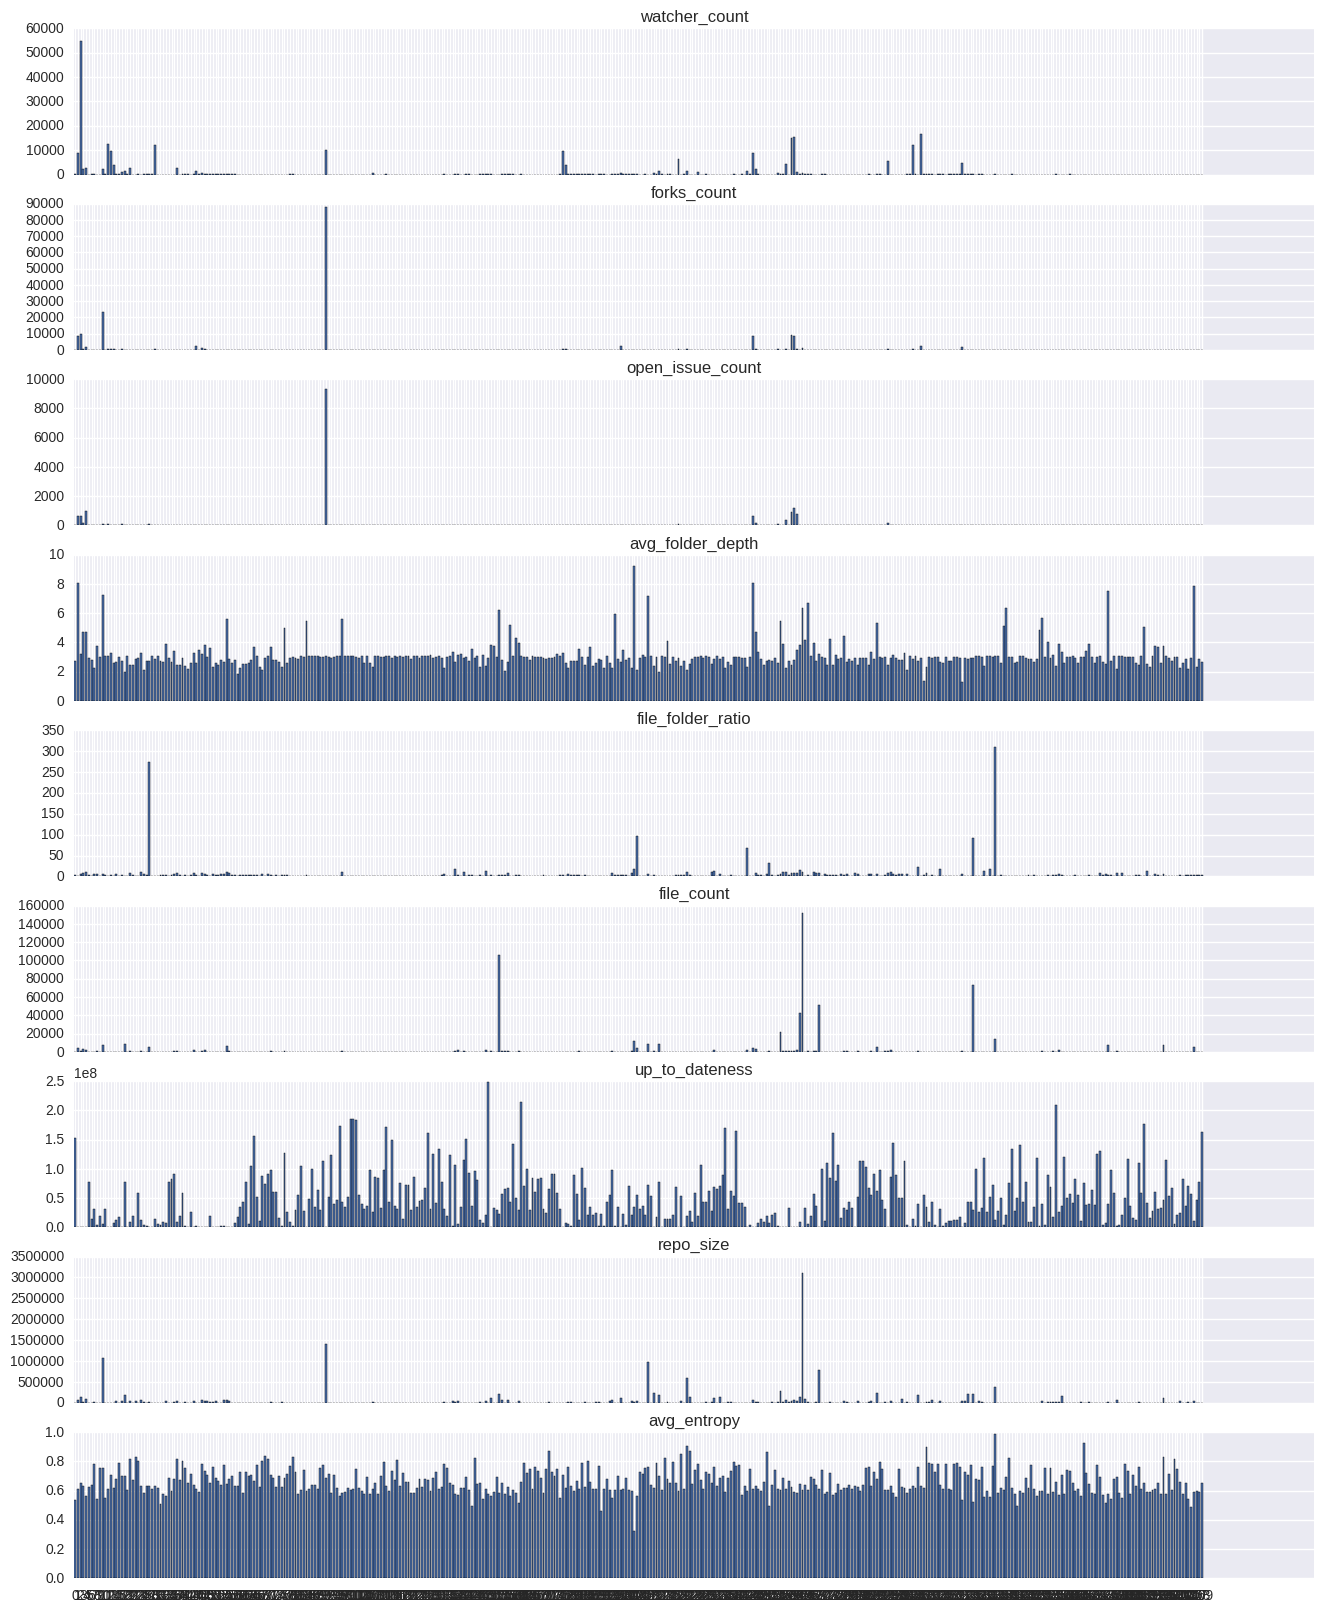

In [8]:
#fig = plt.figure(figsize=(16,8))
f, axarr = plt.subplots(len(metricCollection), sharex=True, figsize=(16,20))

index = np.arange(len(data))
for i, metric in enumerate(metricCollection):
    ax = axarr[i]
    ax.bar(index,
        data[metric],
        0.7, # barwdith
        label=metric
    )
    ax.set_title(metric)

plt.xticks(index + 0.35, index)
None

## TSNE

In [9]:
import sklearn
import sklearn.manifold

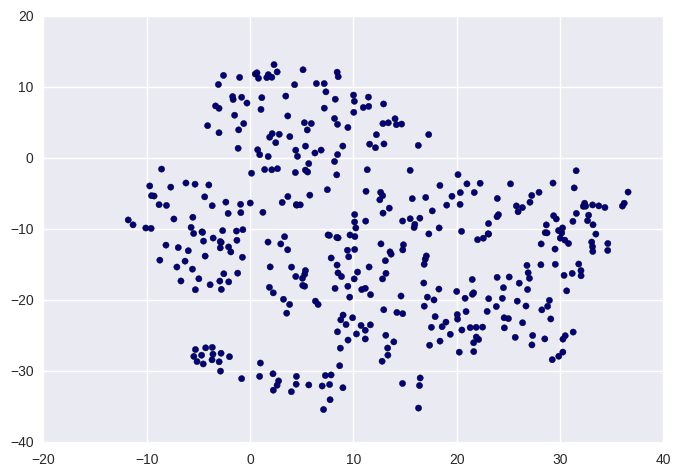

In [16]:
#X = data[['repo_size', 'open_issues', 'forks_count', 'up_to_dateness', 'file_count', 'watcher_count']]
X = norm_data
model = sklearn.manifold.TSNE(n_components=2, random_state=0)
#np.set_printoptions(suppress=True)
vis_data = model.fit_transform(X)

# plot the result
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]

categories = importer.trainset.classification + importer.testset.classification

plt.scatter(vis_x, vis_y, c=[0]*len(categories), cmap=plt.cm.get_cmap("jet", 10))
#plt.clim(-0.5, 9.5)
#plt.xlim(-0.001, 0.001)
#plt.ylim(-0.001, 0.001)
None

In [11]:
t = np.ones((5, 6)) * np.arange(6)
t = t.flatten()
u = np.unique(t)
pos = np.argwhere(t == u[0]).transpose()[0]
t[pos]

array([ 0.,  0.,  0.,  0.,  0.])